In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.decomposition import PCA 
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [25]:
# Load the main dataset 
df = pd.read_csv('cleaned_dataset.csv')

# Display the first few rows of the dataset 
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,...,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,...,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,...,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,...,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,...,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,...,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018


### Bivariate Analysis

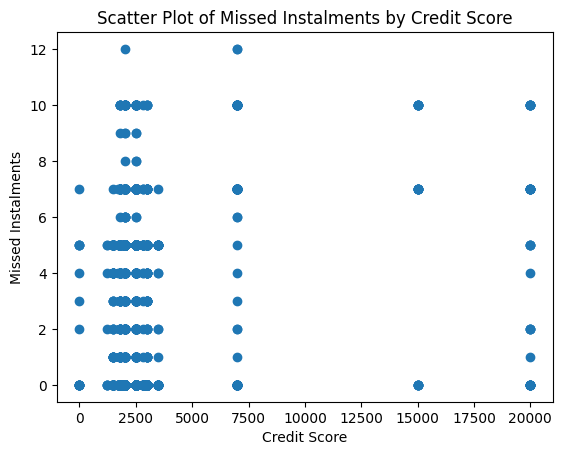

In [26]:
#Scatter plots 

plt.scatter(df['CreditScore'], df['MissedInstalments'])

plt.xlabel('Credit Score')
plt.ylabel('Missed Instalments')
plt.title('Scatter Plot of Missed Instalments by Credit Score')

plt.show()

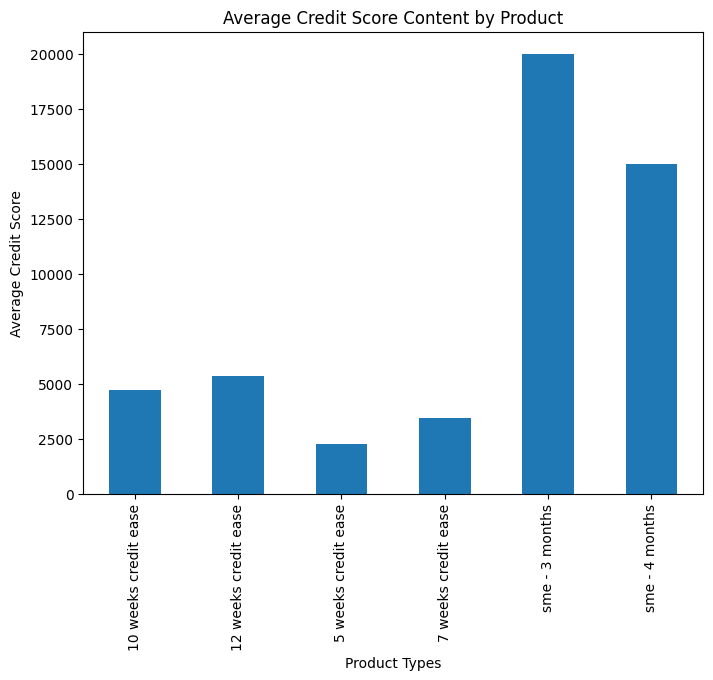

In [27]:
#Group analysis
average_creditscore_by_product = df.groupby('Product')['CreditScore'].mean()

plt.figure(figsize=(8, 6))

average_creditscore_by_product.plot(kind='bar')

plt.xlabel('Product Types')
plt.ylabel('Average Credit Score')
plt.title('Average Credit Score Content by Product')

plt.show()

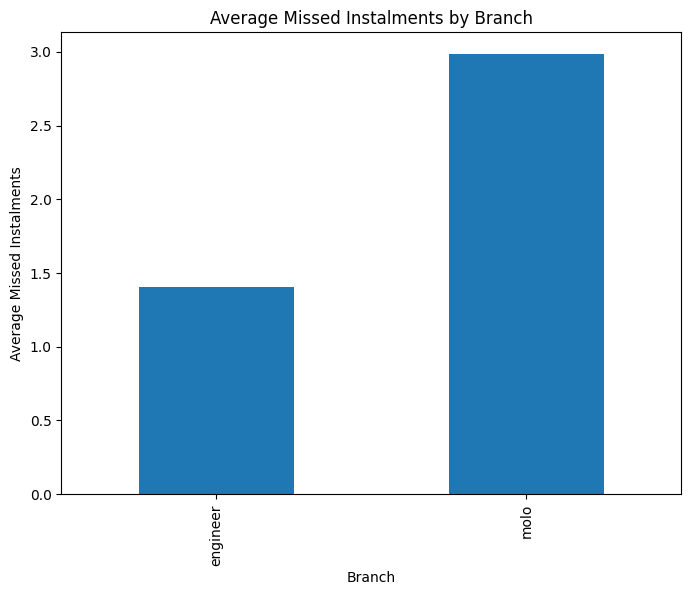

In [28]:
#Group analysis
average_misinstalments_by_branch = df.groupby('Branch')['MissedInstalments'].mean()

plt.figure(figsize=(8, 6))

average_misinstalments_by_branch.plot(kind='bar')

plt.xlabel('Branch')
plt.ylabel('Average Missed Instalments')
plt.title('Average Missed Instalments by Branch')

plt.show()

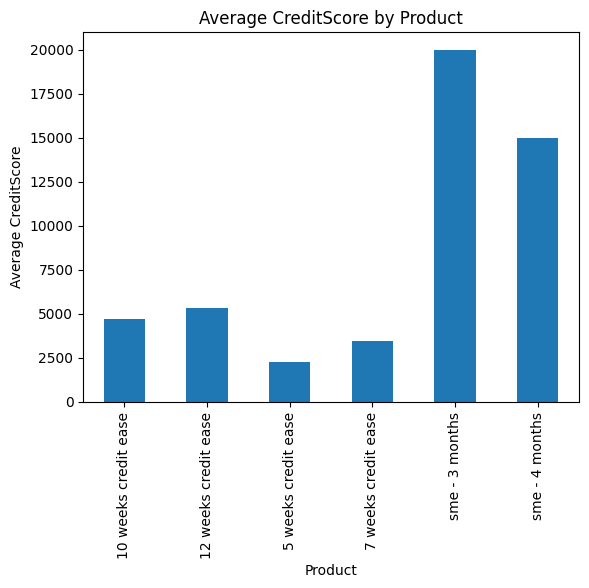

In [29]:
#Product performance 
average_creditscore_by_product = df.groupby('Product')['CreditScore'].mean()

average_creditscore_by_product.plot(kind='bar')

plt.xlabel('Product')
plt.ylabel('Average CreditScore')
plt.title('Average CreditScore by Product')

plt.show()

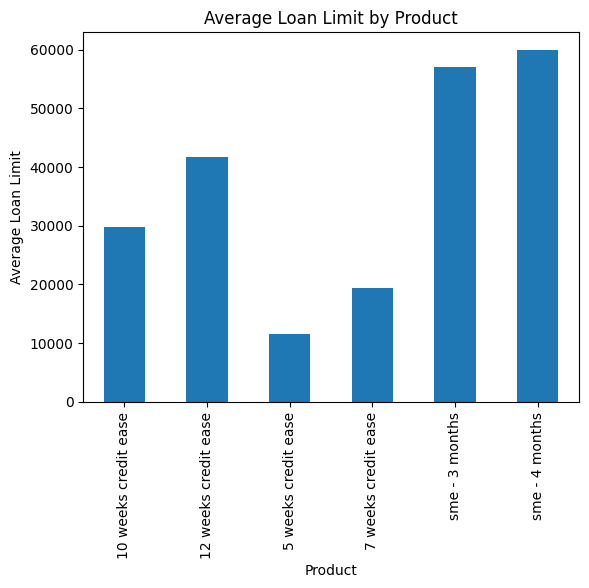

In [30]:
#Product performance 
average_loanlimit_by_product = df.groupby('Product')['LoanLimit'].mean()

average_loanlimit_by_product.plot(kind='bar')

plt.xlabel('Product')
plt.ylabel('Average Loan Limit')
plt.title('Average Loan Limit by Product')

plt.show()

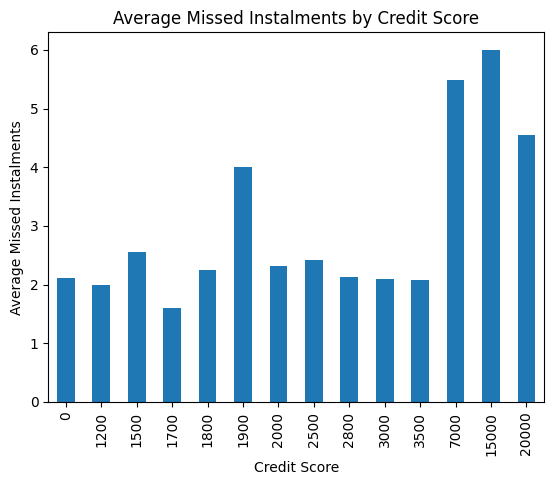

In [31]:
#Credit risk by Missed Instalments

average_missedinstalments_by_creditscore = df.groupby('CreditScore')['MissedInstalments'].mean()

average_missedinstalments_by_creditscore.plot(kind='bar')

plt.xlabel('Credit Score')
plt.ylabel('Average Missed Instalments')
plt.title('Average Missed Instalments by Credit Score')

plt.show()

### Multivariate Analysis

Pair plots: Visualize pairwise relationships between multiple variables using sns.pairplot().

<Figure size 800x600 with 0 Axes>

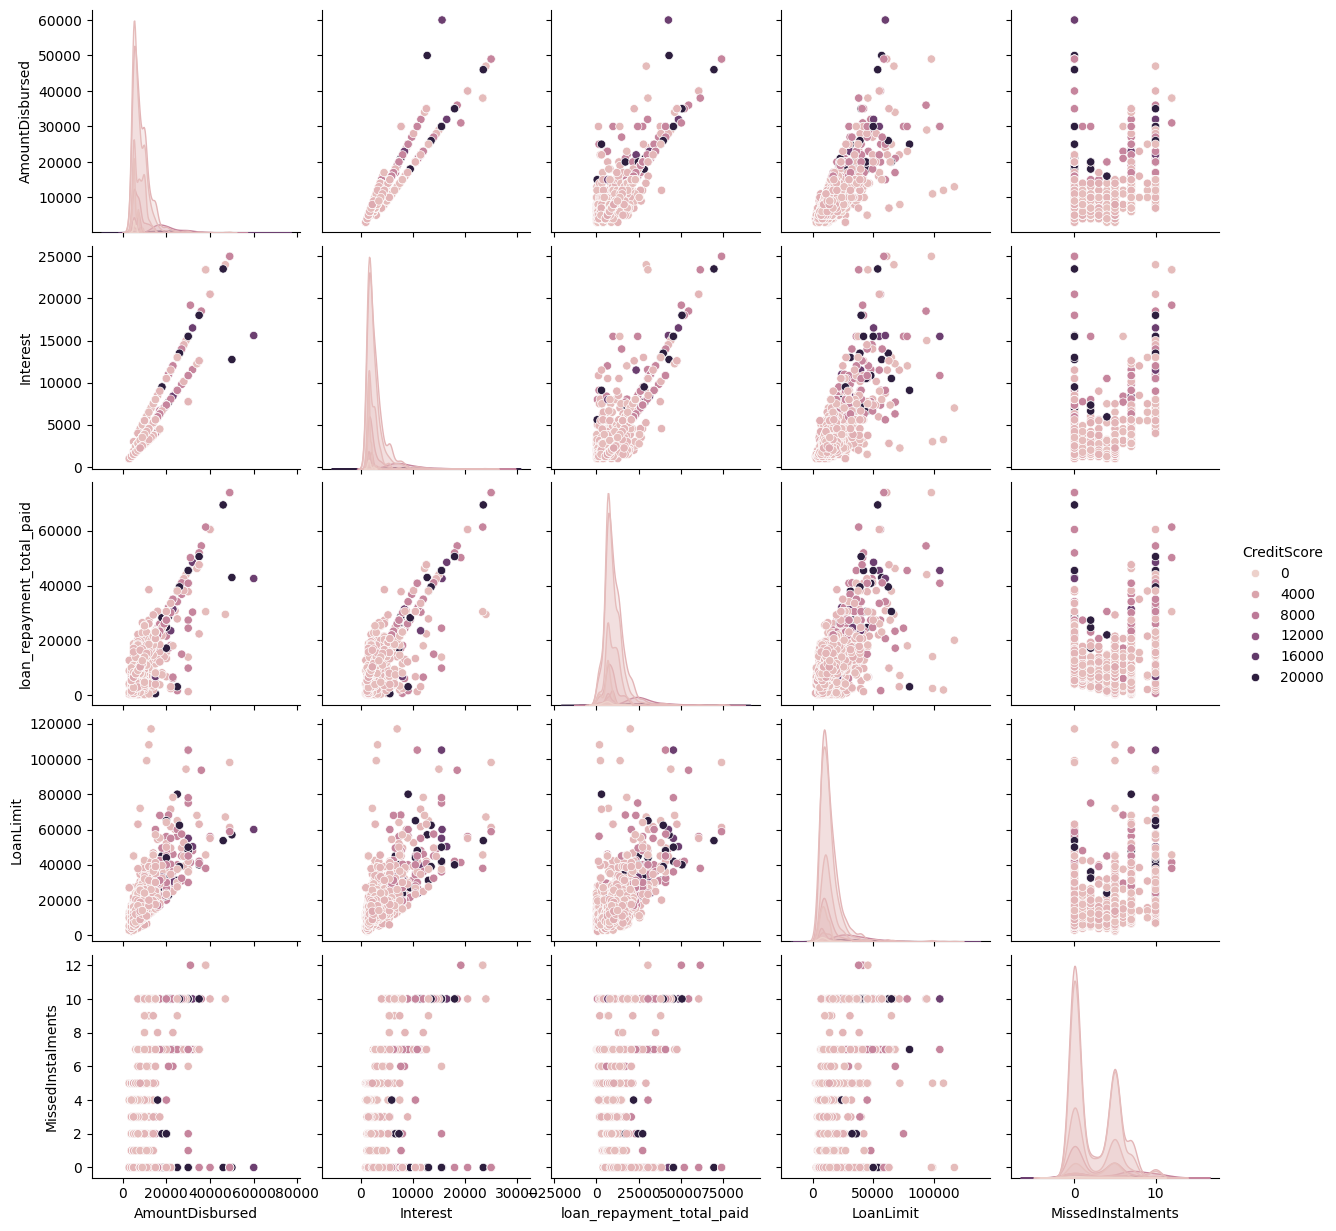

In [32]:
plt.figure(figsize=(8, 6))

features = ['AmountDisbursed', 'Interest', 'loan_repayment_total_paid', 'LoanLimit', 'MissedInstalments', 'CreditScore']

sns.pairplot(df[features], hue='CreditScore') 

plt.show()

Number of defaulters: 265
Percentage of Defaults vs Non-Defaults:
 0    92.367512
1     7.632488
Name: proportion, dtype: float64


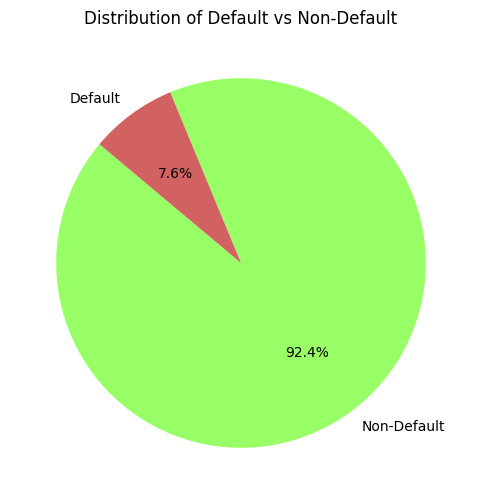

In [33]:
# Understading the target variable Default where default is when ClearDate is greater than 2025-12-15 and LoanBalance is greater than 0
defaulters = ((df['ClearDate'] < '2025-12-15') & (df['LoanBalance'] > 0)).astype(int)
print("Number of defaulters:", defaulters.sum())

# Calculate the percentage of defaults vs non-defaults
default_counts = defaulters.value_counts(normalize=True) * 100
print("Percentage of Defaults vs Non-Defaults:\n", default_counts)

# Visualize the distribution of the target variable as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=['Non-Default', 'Default'], autopct='%1.1f%%', startangle=140, colors=["#99ff66","#d26161"])
plt.title('Distribution of Default vs Non-Default')
plt.show()

In [34]:
# Introduce bool (1,0) for isDefault
df['IsDefault'] = defaulters


In [35]:
# Default check
df['IsDefault'].value_counts(normalize=True)

IsDefault
0    0.923675
1    0.076325
Name: proportion, dtype: float64

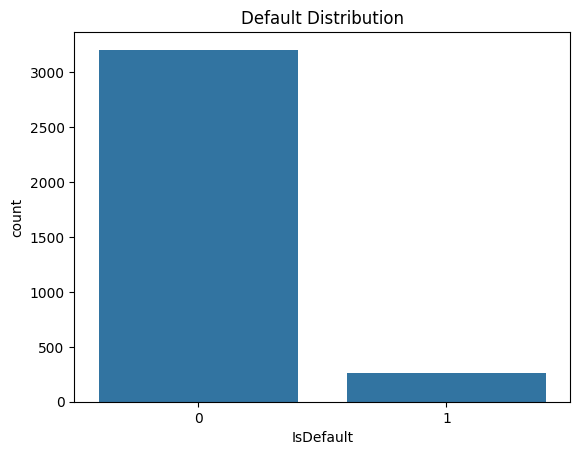

In [36]:
# Visualization 
sns.countplot(x='IsDefault', data=df)
plt.title("Default Distribution")
plt.show()


In [37]:
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,...,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished,IsDefault
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,...,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017,0
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,...,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019,0
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,...,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014,0
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,...,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018,0
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,...,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018,0


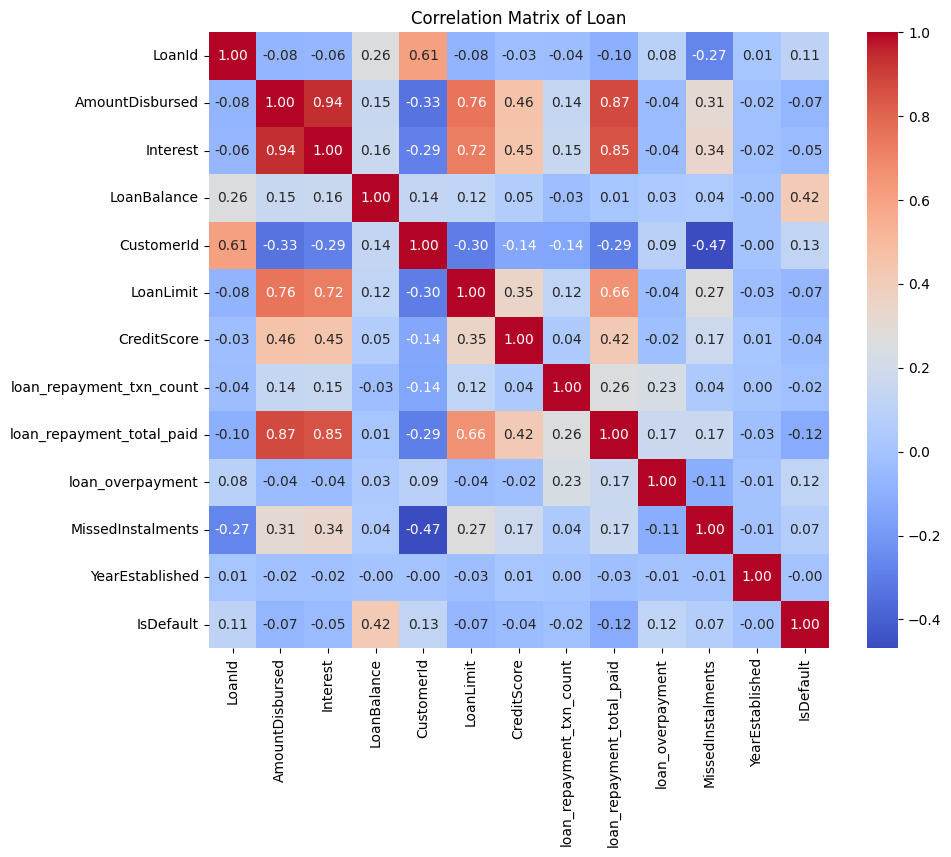

In [38]:
#Correlation (numerical values)
plt.figure(figsize=(10, 8))

numeric_data = df.select_dtypes(include=['number'])

correlations = numeric_data.corr()

sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Loan')

plt.show()

**Features engineering on relationships between:**
- AmountDisbursed & Interest (&Loan Limit) & (loan_repayment_total_paid) & CustomerID
- Interest & loan_repayment_total_paid
- MissedInstalments & Customer ID 
- CreditScore & AmountDisbursed & Interest
- Default rate and LoanBalance & loan_repayment_total_paid

**Factors Expected to Decrease the Probability of Default (Negative Sign)**
- Gender 
- Duration as a borrower of MFI (Old): Longer seniority as a client in the MFI is expected to reduce the probability of default
- Previously granted loans (LoanID/CustomerID/LoanLimit): A higher number of previously granted loans is expected to contribute to reducing the probability of default

**Factors Expected to Increase the Probability of Default (Positive Sign)**
- Credit score 
- Amount (LoanBalance): Larger loan amounts are expected to be associated with higher PD
- missed instalments 

--> VALIDATE THESE HYPOTHESIS THROUGH FEATURE ENGINEERING & EDA 

**Metrics to measure default status of customers:** (do EDA on that): 
- Loan utilization (feature engineering)
- Repayment ratio (feature engineering)
- Missed instalments 
- Business age 
- Credit Score 


**Process**: 
- light EDA - feature engineering - EDA - feature engineering

##### **HYPOTHESIS CHECKING 1:** GENDER VS DEFAULT: Women default less than men.


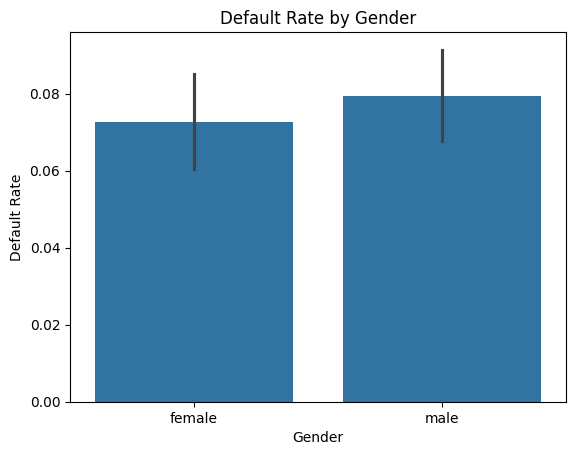

In [39]:
df.groupby('Gender')['IsDefault'].mean()

#Visualization
sns.barplot(x='Gender', y='IsDefault', data=df)
plt.title("Default Rate by Gender")
plt.ylabel("Default Rate")
plt.show()



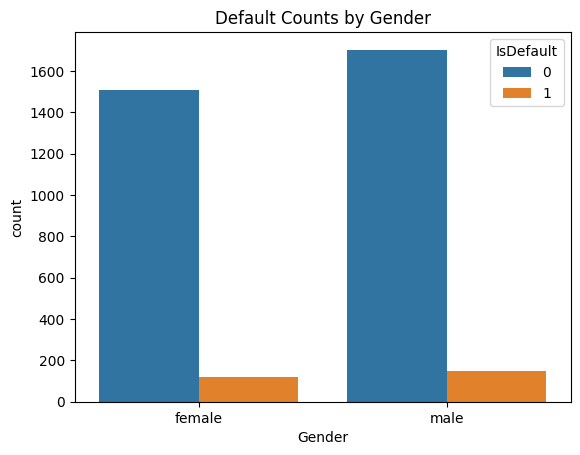

In [40]:
sns.countplot(
    x='Gender',
    hue='IsDefault',
    data=df
)

plt.title("Default Counts by Gender")
plt.show()

##### **HYPOTHESIS CHECKING 2:** Previously granted loans: A higher number of previously granted loans is expected to contribute to reducing the probability of default



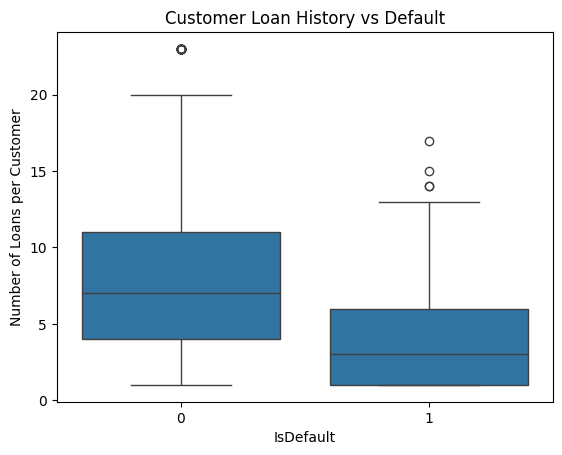

In [41]:
#Compute the number of loans taken by each customer
loan_counts = df.groupby('CustomerId')['LoanId'].transform('count')

#Create a boxplot to compare loan history between defaulters and non-defaulters
sns.boxplot(
    x=df['IsDefault'], # default status (non-defaulters = 0, defaulters = 1)
    y=loan_counts       # number of loans per customer
)

plt.title("Customer Loan History vs Default")
plt.xlabel("IsDefault")
plt.ylabel("Number of Loans per Customer")
plt.show()

**Customers who have borrowed more times in the past are less likely to default.**
The typical (median) number of loans is higher for customers who did not default, which suggests that longer borrowing experience with the institution reduces default risk.

##### **HYPOTHESIS CHECKING 3:** Duration as a borrower of MFI: Longer seniority as a client in the MFI is expected to reduce the probability of default

/var/folders/l1/c99z4mxd4ys7m4330g1z_lcc0000gn/T/ipykernel_54381/1826587059.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


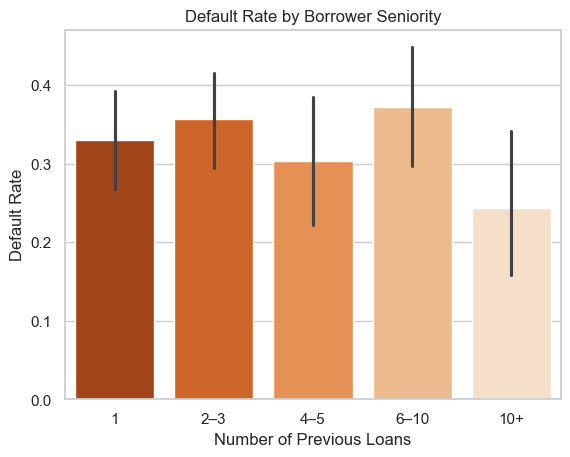

In [51]:
# Number of loans (customer seniority)
loan_counts = df.groupby('CustomerId')['LoanId'].count()

# Default status per customer 
customer_default = df.groupby('CustomerId')['IsDefault'].max()

# Create another dataframe, avoid manipulating the original dataset 
customer_level = pd.DataFrame({
    'num_loans': loan_counts,
    'IsDefault': customer_default
})

# Default rate by seniority bucket 
customer_level['seniority_bucket'] = pd.cut(
    customer_level['num_loans'],
    bins=[0, 1, 3, 5, 10, customer_level['num_loans'].max()],
    labels=['1', '2–3', '4–5', '6–10', '10+'],
    right=True)

sns.barplot(
    x='seniority_bucket',
    y='IsDefault',
    data=customer_level,
    palette='Oranges_r',      # darker = higher risk
    errorbar=('ci', 95)     # confidence intervals
)

plt.title("Default Rate by Borrower Seniority")
plt.xlabel("Number of Previous Loans")
plt.ylabel("Default Rate")
plt.show()

Default risk is lowest among borrowers with limited prior loan experience (2–3 loans) and increases for highly seasoned borrowers. 

While early repeat borrowing is associated with improved repayment behavior, excessive borrowing may increase risk due to higher exposure or over-indebtedness.

**→ Contradict the Hypothesis**

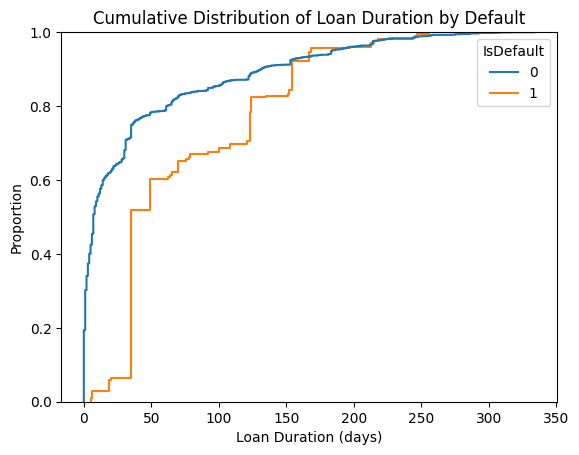

In [45]:
valid_duration = (pd.to_datetime(df['ClearDate']) - pd.to_datetime(df['BorrowDate'])).dt.days 
valid_duration = valid_duration[valid_duration >= 0]

sns.ecdfplot(
    x=valid_duration,
    hue=df.loc[valid_duration.index, 'IsDefault']
)

plt.title("Cumulative Distribution of Loan Duration by Default")
plt.xlabel("Loan Duration (days)")
plt.show()

##### **HYPOTHESIS CHECKING 4:** Credit Score & Misinstalments - Expected to Increase the Probability of Default (Positive Sign)

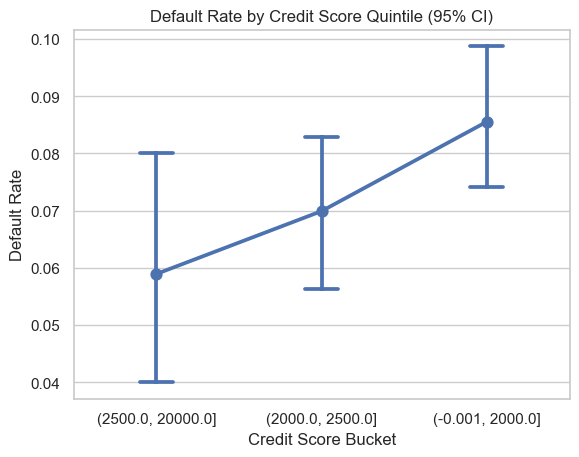

In [76]:
# Default rate by credit score buckets (trend check)
score_bucket = pd.qcut(df['CreditScore'], q=5, duplicates='drop')

sns.pointplot(
    x=score_bucket.astype(str),
    y=df['IsDefault'],
    errorbar=('ci', 95),
    capsize=0.2
)

plt.title("Default Rate by Credit Score Quintile (95% CI)")
plt.xlabel("Credit Score Bucket")
plt.ylabel("Default Rate")
plt.show()

Customers with weaker credit profiles are more likely to default, confirming that credit score is a strong risk discriminator

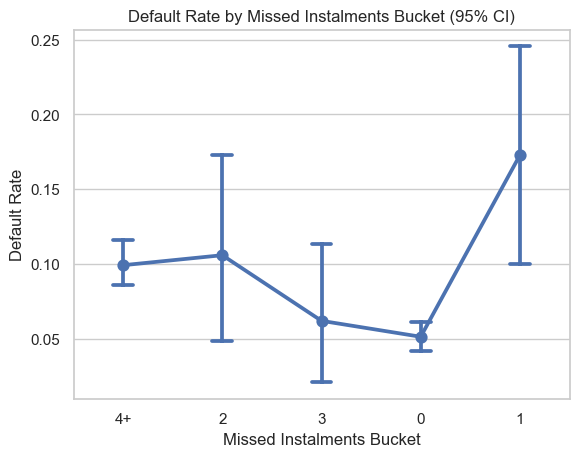

In [ ]:
# Default rate by missed instalment buckets (trend check)
miss_bucket = pd.cut(
    df['MissedInstalments'],
    bins=[-0.1, 0, 1, 2, 3, df['MissedInstalments'].max()],
    labels=['0', '1', '2', '3', '4+']
)

sns.pointplot(
    x=miss_bucket.astype(str),
    y=df['IsDefault'],
    errorbar=('ci', 95),
    capsize=0.2
)

plt.title("Default Rate by Missed Instalments Bucket (95% CI)")
plt.xlabel("Missed Instalments Bucket")
plt.ylabel("Default Rate")
plt.show()


**Default risk increases sharply after the first missed instalment,** indicating that early delinquency is a critical predictor of default. Additional missed instalments increase risk, but not always linearly 